In [42]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# veri setini download etmek için inernet bağlantınız olması gerekmektedir.
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
# verileri ik, boyutlu tutuyor. Fotoğraflara bakmak için tek boyutlu yapalım
y_test[:3]
y_test = y_test.reshape(-1)

In [7]:
y_test.shape

(10000,)

In [8]:
# etiketler index olarak verildiği için adlarının manuel verelim
image_class = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(image_class[y[index]])

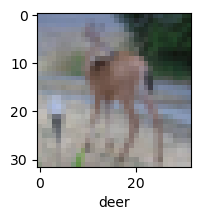

In [9]:
plot_sample(X_test,y_test,100)

### Normalization

Verilerimizi normalize etmemiz gerekiyor. Aksi takdirde CNN algoritmaları yanlış sonuç verebiliyor. 
Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalization için basitçe her bir pixel değerini 255'e bölmemiz yeterli..

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
deep_learning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
deep_learning_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7879 - accuracy: 0.7278
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7357 - accuracy: 0.7438
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6940 - accuracy: 0.7561
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6519 - accuracy: 0.7712
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6163 - accuracy: 0.7849
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5839 - accuracy: 0.7945
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5498 - accuracy: 0.8059
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5201 - accuracy: 0.8171
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4901 - accuracy: 0.8250
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [15]:
# eğitimin performansını test verileriyle değerlendirelim
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.0259 - accuracy: 0.6922


[1.0259287357330322, 0.6922000050544739]

In [34]:
y_pred = deep_learning_model.predict(X_test)

In [35]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([3, 1, 8, 0, 4], dtype=int64)

'automobile'

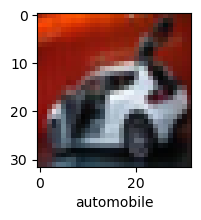

In [36]:
plot_sample(X_test,y_test,6)
image_class[y_pred[6]]

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

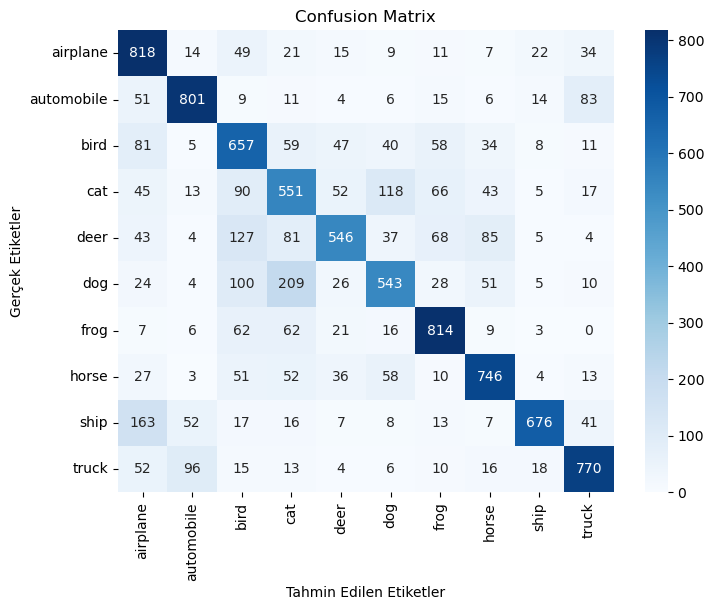

In [46]:
# configure matrix i yazalım
cm = confusion_matrix(y_test, y_pred)

# Görselleştirmek için heatmap kullanalım
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=image_class, yticklabels=image_class)
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix')
plt.show()
